In [2]:
import pandas as pd

# Load Excel file
df = pd.read_csv("paddy_2020_2023_combined.csv")

#First few rows
df.head()

,Unnamed: 0,Unnamed: 1,GROSS EXTENT SOWN(Hectares),Unnamed: 3,Unnamed: 4,Unnamed: 5,GROSS EXTENT HARVESTED(Hectares),Unnamed: 7,Unnamed: 8,Unnamed: 9,AVERAGE YIELD PER NETT HECTARE(kg),Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,DISTRICT,MAJOR,MINOR,RAINFED,ALL,MAJOR,MINOR,RAINFED,ALL,MAJOR,MINOR,RAINFED,AVERAGE,HARVESTED,PRODUCTION
1,NaN,SCHEMES,SCHEMES,NaN,SCHEMES,SCHEMES,SCHEMES,NaN,SCHEMES,SCHEMES,SCHEMES,NaN,YIELD,(Hectares),(MT.)
2,COLOMBO,256,558,"2,050","2,864",256,558,"2,050","2,864","3,699","3,496","3,506","3,521","2,434","8,571"
3,GAMPAHA,"1,544","3,277","4,893","9,714","1,461","3,231","4,871","9,563","4,423","4,156","4,240","4,240","8,128","34,460"
4,KALUTARA,107,"1,304","8,145","9,556",107,"1,303","8,080","9,490","3,644","3,523","3,660","3,641","8,756","31,876"


In [3]:
df.shape     # Rows and columns
df.columns   # Column names

Index(['Unnamed: 0', 'Unnamed: 1', 'GROSS EXTENT SOWN(Hectares)', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'GROSS EXTENT HARVESTED(Hectares)',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'AVERAGE YIELD PER NETT HECTARE(kg)', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [4]:
df.info() #information of the dataset 
df.isnull().sum() #sum of the missing values it won't show prperly due to the fact that null value columns have '-' in it. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          209 non-null    object
 1   Unnamed: 1                          210 non-null    object
 2   GROSS EXTENT SOWN(Hectares)         210 non-null    object
 3   Unnamed: 3                          209 non-null    object
 4   Unnamed: 4                          210 non-null    object
 5   Unnamed: 5                          210 non-null    object
 6   GROSS EXTENT HARVESTED(Hectares)    210 non-null    object
 7   Unnamed: 7                          209 non-null    object
 8   Unnamed: 8                          210 non-null    object
 9   Unnamed: 9                          210 non-null    object
 10  AVERAGE YIELD PER NETT HECTARE(kg)  210 non-null    object
 11  Unnamed: 11                         209 non-null    object

Unnamed: 0                            1
Unnamed: 1                            0
GROSS EXTENT SOWN(Hectares)           0
Unnamed: 3                            1
Unnamed: 4                            0
Unnamed: 5                            0
GROSS EXTENT HARVESTED(Hectares)      0
Unnamed: 7                            1
Unnamed: 8                            0
Unnamed: 9                            0
AVERAGE YIELD PER NETT HECTARE(kg)    0
Unnamed: 11                           1
Unnamed: 12                           0
Unnamed: 13                           0
Unnamed: 14                           0
dtype: int64

**Data Observation & Preprocessing**

In [5]:
#To adjusting the column headers properly 
import pandas as pd

# Step 1: Read the CSV without treating any row as header
df_raw = pd.read_csv("paddy_2020_2023_combined.csv", header=None)

# Step 2: Combine the first 3 rows as column headers
header1 = df_raw.iloc[0].fillna('')
header2 = df_raw.iloc[1].fillna('')
header3 = df_raw.iloc[2].fillna('')

# Combine all three into one line per column
combined_headers = (
    header1.astype(str).str.strip() + ' ' +
    header2.astype(str).str.strip() + ' ' +
    header3.astype(str).str.strip()
).str.replace(r'\s+', ' ', regex=True).str.strip()

# Step 3: Slice the dataframe starting from row 3 (data starts here)
df = df_raw.iloc[3:].copy()
df.columns = combined_headers
df.reset_index(drop=True, inplace=True)

# Optional: Show final column names
print(df.columns.tolist())
df.head()

# Step 4: Save the DataFrame to a new CSV file
output_file = "paddy_data_with_headers.csv"
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"The DataFrame with adjusted headers has been saved to '{output_file}'")


['DISTRICT', 'MAJOR SCHEMES', 'GROSS EXTENT SOWN(Hectares) MINOR SCHEMES', 'RAINFED', 'ALL SCHEMES', 'MAJOR SCHEMES', 'GROSS EXTENT HARVESTED(Hectares) MINOR SCHEMES', 'RAINFED', 'ALL SCHEMES', 'MAJOR SCHEMES', 'AVERAGE YIELD PER NETT HECTARE(kg) MINOR SCHEMES', 'RAINFED', 'AVERAGE YIELD', 'HARVESTED (Hectares)', 'PRODUCTION (MT.)']
The DataFrame with adjusted headers has been saved to 'paddy_data_with_headers.csv'


In [6]:
df.shape        # number rows and columns
df.columns     # column names
df.info()     # data types of the datapoints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 15 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   DISTRICT                                          208 non-null    object
 1   MAJOR SCHEMES                                     208 non-null    object
 2   GROSS EXTENT SOWN(Hectares) MINOR SCHEMES         208 non-null    object
 3   RAINFED                                           208 non-null    object
 4   ALL SCHEMES                                       208 non-null    object
 5   MAJOR SCHEMES                                     208 non-null    object
 6   GROSS EXTENT HARVESTED(Hectares) MINOR SCHEMES    208 non-null    object
 7   RAINFED                                           208 non-null    object
 8   ALL SCHEMES                                       208 non-null    object
 9   MAJOR SCHEMES                   

In [7]:
import matplotlib.pyplot as plt

#Replace hyphens, empty strings, and whitespace-only cells with NaN
df.replace(to_replace=[r'^\s*$', '-', '—'], value=pd.NA, regex=True, inplace=True)

#Show missing values per column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
DISTRICT                                             0
MAJOR SCHEMES                                       14
GROSS EXTENT SOWN(Hectares) MINOR SCHEMES            6
RAINFED                                             22
ALL SCHEMES                                          4
MAJOR SCHEMES                                       14
GROSS EXTENT HARVESTED(Hectares) MINOR SCHEMES       6
RAINFED                                             22
ALL SCHEMES                                          4
MAJOR SCHEMES                                       14
AVERAGE YIELD PER NETT HECTARE(kg) MINOR SCHEMES     6
RAINFED                                             23
AVERAGE YIELD                                        4
HARVESTED (Hectares)                                 4
PRODUCTION (MT.)                                     4
dtype: int64


In [8]:
print("Districts:", df['DISTRICT'].unique())

print("Year Check:", df['Year'].unique() if 'Year' in df.columns else 'Year column missing')

print("Season Check:", df['Season'].unique() if 'Season' in df.columns else 'Season column missing')


Districts: ['COLOMBO' 'GAMPAHA' 'KALUTARA' 'KANDY' 'MATALE' 'NUWARAELIYA' 'GALLE'
 'MATARA' 'HAMBANTOTA' 'JAFFNA' 'MANNAR' 'VAVUNIYA' 'MULATIVU'
 'KILLINOCHCHI' 'BATTICALOA' 'AMPARA' 'TRINCOMALEE' 'KURUNEGALA'
 'PUTTALAM' 'ANURADHAPURA' 'POLONNARUWA' 'BADULLA' 'MONARAGALA'
 'RATNAPURA' 'KEGALLE' 'SRI LANKA' 'Total']
Year Check: Year column missing
Season Check: Season column missing


In [9]:
district_col = [col for col in df.columns if 'DISTRICT' in col.upper()][0]

#stanarize the values 
district_series = df[district_col].astype(str).str.upper().str.strip()

#Find the row indices with equal to 'SRI LANKA' or 'TOTAL'
end_indices = district_series[district_series.isin(['SRI LANKA', 'TOTAL'])].index

#giving the start and end block range 
start = 0 
blocks = []
for end in end_indices:
    blocks.append((start, end))
    start = end + 1

#Seasons and Years in Order
season_year_pair = [
    ('Maha',2020), ('Yala',2020),
    ('Maha',2021), ('Yala',2021),
    ('Maha',2022), ('Yala',2022),
    ('Maha',2023), ('Yala',2023)
]

for (start, end), (season, year) in zip(blocks, season_year_pair):
    df.loc[start:end, 'Season'] = season
    df.loc[start:end, 'Year'] = year

# Check result
print(df[['Season', 'Year']].drop_duplicates())

    Season    Year
0     Maha  2020.0
26    Yala  2020.0
52    Maha  2021.0
78    Yala  2021.0
104   Maha  2022.0
130   Yala  2022.0
156   Maha  2023.0
182   Yala  2023.0


In [10]:
for (start, end), (season, year) in zip(blocks, season_year_pair):
    print(f"\n{year} {season} — Districts:")
    print(df.loc[start:end, district_col].values)


2020 Maha — Districts:
['COLOMBO' 'GAMPAHA' 'KALUTARA' 'KANDY' 'MATALE' 'NUWARAELIYA' 'GALLE'
 'MATARA' 'HAMBANTOTA' 'JAFFNA' 'MANNAR' 'VAVUNIYA' 'MULATIVU'
 'KILLINOCHCHI' 'BATTICALOA' 'AMPARA' 'TRINCOMALEE' 'KURUNEGALA'
 'PUTTALAM' 'ANURADHAPURA' 'POLONNARUWA' 'BADULLA' 'MONARAGALA'
 'RATNAPURA' 'KEGALLE' 'SRI LANKA']

2020 Yala — Districts:
['COLOMBO' 'GAMPAHA' 'KALUTARA' 'KANDY' 'MATALE' 'NUWARAELIYA' 'GALLE'
 'MATARA' 'HAMBANTOTA' 'JAFFNA' 'MANNAR' 'VAVUNIYA' 'MULATIVU'
 'KILLINOCHCHI' 'BATTICALOA' 'AMPARA' 'TRINCOMALEE' 'KURUNEGALA'
 'PUTTALAM' 'ANURADHAPURA' 'POLONNARUWA' 'BADULLA' 'MONARAGALA'
 'RATNAPURA' 'KEGALLE' 'SRI LANKA']

2021 Maha — Districts:
['COLOMBO' 'GAMPAHA' 'KALUTARA' 'KANDY' 'MATALE' 'NUWARAELIYA' 'GALLE'
 'MATARA' 'HAMBANTOTA' 'JAFFNA' 'MANNAR' 'VAVUNIYA' 'MULATIVU'
 'KILLINOCHCHI' 'BATTICALOA' 'AMPARA' 'TRINCOMALEE' 'KURUNEGALA'
 'PUTTALAM' 'ANURADHAPURA' 'POLONNARUWA' 'BADULLA' 'MONARAGALA'
 'RATNAPURA' 'KEGALLE' 'Total']

2021 Yala — Districts:
['COLOMBO' 

In [11]:
df.columns

Index(['DISTRICT', 'MAJOR SCHEMES',
       'GROSS EXTENT SOWN(Hectares) MINOR SCHEMES', 'RAINFED', 'ALL SCHEMES',
       'MAJOR SCHEMES', 'GROSS EXTENT HARVESTED(Hectares) MINOR SCHEMES',
       'RAINFED', 'ALL SCHEMES', 'MAJOR SCHEMES',
       'AVERAGE YIELD PER NETT HECTARE(kg) MINOR SCHEMES', 'RAINFED',
       'AVERAGE YIELD', 'HARVESTED (Hectares)', 'PRODUCTION (MT.)', 'Season',
       'Year'],
      dtype='object')

In [12]:
df.columns = [
    'District',
    'Sown_Major_Schemes',
    'Sown_Minor_Schemes',
    'Sown_Rainfed',
    'Sown_All_Schemes',
    'Harvested_Major_Schemes',
    'Harvested_Minor_Schemes',
    'Harvested_Rainfed',
    'Harvested_All_Schemes',
    'Yield_Major_Schemes',
    'Yield_Minor_Schemes',
    'Yield_Rainfed',
    'Yield_Average',
    'Harvested_Hectares',
    'Production_MT',
    'Season',
    'Year'
]

In [13]:
print(df.columns.tolist())
df.head(10)

['District', 'Sown_Major_Schemes', 'Sown_Minor_Schemes', 'Sown_Rainfed', 'Sown_All_Schemes', 'Harvested_Major_Schemes', 'Harvested_Minor_Schemes', 'Harvested_Rainfed', 'Harvested_All_Schemes', 'Yield_Major_Schemes', 'Yield_Minor_Schemes', 'Yield_Rainfed', 'Yield_Average', 'Harvested_Hectares', 'Production_MT', 'Season', 'Year']


,District,Sown_Major_Schemes,Sown_Minor_Schemes,Sown_Rainfed,Sown_All_Schemes,Harvested_Major_Schemes,Harvested_Minor_Schemes,Harvested_Rainfed,Harvested_All_Schemes,Yield_Major_Schemes,Yield_Minor_Schemes,Yield_Rainfed,Yield_Average,Harvested_Hectares,Production_MT,Season,Year
0,COLOMBO,256,558,"2,050","2,864",256,558,"2,050","2,864","3,699","3,496","3,506","3,521","2,434","8,571",Maha,2020.0
1,GAMPAHA,"1,544","3,277","4,893","9,714","1,461","3,231","4,871","9,563","4,423","4,156","4,240","4,240","8,128","34,460",Maha,2020.0
2,KALUTARA,107,"1,304","8,145","9,556",107,"1,303","8,080","9,490","3,644","3,523","3,660","3,641","8,756","31,876",Maha,2020.0
3,KANDY,"4,201","4,797","2,006","11,004","4,200","4,793","2,000","10,993","5,777","3,229","4,432","4,422","8,694","38,440",Maha,2020.0
4,MATALE,"6,877","7,076","4,505","18,458","6,846","7,044","4,496","18,386","5,415","5,162","5,406","5,316","16,534","87,897",Maha,2020.0
5,NUWARAELIYA,420,"1,310",5,"1,735",420,"1,310",5,"1,735","3,605","3,607","4,034","3,608",977,"3,525",Maha,2020.0
6,GALLE,205,"1,448","6,296","7,949",205,"1,448","6,286","7,939","4,000","3,845","4,011","3,980","6,213","24,728",Maha,2020.0
7,MATARA,"3,898","2,767","5,081","11,746","3,855","2,697","5,044","11,596","4,628","3,553","3,498","3,886","9,155","35,581",Maha,2020.0
8,HAMBANTOTA,"28,003","5,827","1,148","34,978","27,970","5,821","1,142","34,933","6,568","5,478","3,992","6,302","30,521","192,353",Maha,2020.0
9,JAFFNA,_,_,"10,445","10,445",_,_,"10,291","10,291",_,_,"3,628","3,628","9,132","33,135",Maha,2020.0


In [14]:
numeric_cols = [
    'Sown_Major_Schemes','Sown_Minor_Schemes','Sown_Rainfed','Sown_All_Schemes',
    'Harvested_Major_Schemes','Harvested_Minor_Schemes','Harvested_Rainfed','Harvested_All_Schemes',
    'Yield_Major_Schemes','Yield_Minor_Schemes','Yield_Rainfed','Yield_Average','Harvested_Hectares','Production_MT'
    
]

for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',','',regex=False).str.strip()
    df[col] = pd.to_numeric(df[col],errors='coerce')

In [15]:
df.head(50)

,District,Sown_Major_Schemes,Sown_Minor_Schemes,Sown_Rainfed,Sown_All_Schemes,Harvested_Major_Schemes,Harvested_Minor_Schemes,Harvested_Rainfed,Harvested_All_Schemes,Yield_Major_Schemes,Yield_Minor_Schemes,Yield_Rainfed,Yield_Average,Harvested_Hectares,Production_MT,Season,Year
0,COLOMBO,256.0,558.0,2050.0,2864.0,256.0,558.0,2050.0,2864.0,3699.0,3496.0,3506.0,3521.0,2434.0,8571.0,Maha,2020.0
1,GAMPAHA,1544.0,3277.0,4893.0,9714.0,1461.0,3231.0,4871.0,9563.0,4423.0,4156.0,4240.0,4240.0,8128.0,34460.0,Maha,2020.0
2,KALUTARA,107.0,1304.0,8145.0,9556.0,107.0,1303.0,8080.0,9490.0,3644.0,3523.0,3660.0,3641.0,8756.0,31876.0,Maha,2020.0
3,KANDY,4201.0,4797.0,2006.0,11004.0,4200.0,4793.0,2000.0,10993.0,5777.0,3229.0,4432.0,4422.0,8694.0,38440.0,Maha,2020.0
4,MATALE,6877.0,7076.0,4505.0,18458.0,6846.0,7044.0,4496.0,18386.0,5415.0,5162.0,5406.0,5316.0,16534.0,87897.0,Maha,2020.0
5,NUWARAELIYA,420.0,1310.0,5.0,1735.0,420.0,1310.0,5.0,1735.0,3605.0,3607.0,4034.0,3608.0,977.0,3525.0,Maha,2020.0
6,GALLE,205.0,1448.0,6296.0,7949.0,205.0,1448.0,6286.0,7939.0,4000.0,3845.0,4011.0,3980.0,6213.0,24728.0,Maha,2020.0
7,MATARA,3898.0,2767.0,5081.0,11746.0,3855.0,2697.0,5044.0,11596.0,4628.0,3553.0,3498.0,3886.0,9155.0,35581.0,Maha,2020.0
8,HAMBANTOTA,28003.0,5827.0,1148.0,34978.0,27970.0,5821.0,1142.0,34933.0,6568.0,5478.0,3992.0,6302.0,30521.0,192353.0,Maha,2020.0
9,JAFFNA,NaN,NaN,10445.0,10445.0,NaN,NaN,10291.0,10291.0,NaN,NaN,3628.0,3628.0,9132.0,33135.0,Maha,2020.0


In [16]:
df.isnull().sum() #check all the null values / missing values

District                    0
Sown_Major_Schemes         19
Sown_Minor_Schemes          8
Sown_Rainfed               22
Sown_All_Schemes            4
Harvested_Major_Schemes    19
Harvested_Minor_Schemes     8
Harvested_Rainfed          22
Harvested_All_Schemes       4
Yield_Major_Schemes        19
Yield_Minor_Schemes         8
Yield_Rainfed              23
Yield_Average               4
Harvested_Hectares          4
Production_MT               4
Season                      0
Year                        0
dtype: int64

In [17]:
df['District'] = df['District'].str.strip().str.upper().replace('TOTAL','SRI LANKA')

In [18]:
df.head(80) #to check the Total has changed to SRI LANKA

,District,Sown_Major_Schemes,Sown_Minor_Schemes,Sown_Rainfed,Sown_All_Schemes,Harvested_Major_Schemes,Harvested_Minor_Schemes,Harvested_Rainfed,Harvested_All_Schemes,Yield_Major_Schemes,Yield_Minor_Schemes,Yield_Rainfed,Yield_Average,Harvested_Hectares,Production_MT,Season,Year
0,COLOMBO,256.0,558.0,2050.0,2864.0,256.0,558.0,2050.0,2864.0,3699.0,3496.0,3506.0,3521.0,2434.0,8571.0,Maha,2020.0
1,GAMPAHA,1544.0,3277.0,4893.0,9714.0,1461.0,3231.0,4871.0,9563.0,4423.0,4156.0,4240.0,4240.0,8128.0,34460.0,Maha,2020.0
2,KALUTARA,107.0,1304.0,8145.0,9556.0,107.0,1303.0,8080.0,9490.0,3644.0,3523.0,3660.0,3641.0,8756.0,31876.0,Maha,2020.0
3,KANDY,4201.0,4797.0,2006.0,11004.0,4200.0,4793.0,2000.0,10993.0,5777.0,3229.0,4432.0,4422.0,8694.0,38440.0,Maha,2020.0
4,MATALE,6877.0,7076.0,4505.0,18458.0,6846.0,7044.0,4496.0,18386.0,5415.0,5162.0,5406.0,5316.0,16534.0,87897.0,Maha,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,RATNAPURA,4168.0,5886.0,3038.0,13092.0,4164.0,5857.0,3020.0,13041.0,4524.0,2897.0,2676.0,3365.0,11085.0,37299.0,Maha,2021.0
76,KEGALLE,NaN,1784.0,4517.0,6301.0,NaN,1779.0,4512.0,6291.0,NaN,3395.0,3540.0,3499.0,5894.0,20620.0,Maha,2021.0
77,SRI LANKA,356063.0,203168.0,216615.0,775846.0,354711.0,200901.0,210536.0,766148.0,3126.0,2802.0,2589.0,2853.0,685164.0,1931230.0,Maha,2021.0
78,COLOMBO,286.0,327.0,1908.0,2521.0,253.0,319.0,1776.0,2348.0,2606.0,2795.0,2372.0,2455.0,1996.0,4899.0,Yala,2021.0


In [19]:
df['Is_National'] = df['District'].str.upper() == 'SRI LANKA'

In [20]:
df[['District','Is_National']].value_counts()

District      Is_National
AMPARA        False          8
ANURADHAPURA  False          8
TRINCOMALEE   False          8
SRI LANKA     True           8
RATNAPURA     False          8
PUTTALAM      False          8
POLONNARUWA   False          8
NUWARAELIYA   False          8
MULATIVU      False          8
MONARAGALA    False          8
MATARA        False          8
MATALE        False          8
MANNAR        False          8
KURUNEGALA    False          8
KILLINOCHCHI  False          8
KEGALLE       False          8
KANDY         False          8
KALUTARA      False          8
JAFFNA        False          8
HAMBANTOTA    False          8
GAMPAHA       False          8
GALLE         False          8
COLOMBO       False          8
BATTICALOA    False          8
BADULLA       False          8
VAVUNIYA      False          8
Name: count, dtype: int64

In [21]:
df[~df['Is_National']]
df.head(30)

,District,Sown_Major_Schemes,Sown_Minor_Schemes,Sown_Rainfed,Sown_All_Schemes,Harvested_Major_Schemes,Harvested_Minor_Schemes,Harvested_Rainfed,Harvested_All_Schemes,Yield_Major_Schemes,Yield_Minor_Schemes,Yield_Rainfed,Yield_Average,Harvested_Hectares,Production_MT,Season,Year,Is_National
0,COLOMBO,256.0,558.0,2050.0,2864.0,256.0,558.0,2050.0,2864.0,3699.0,3496.0,3506.0,3521.0,2434.0,8571.0,Maha,2020.0,False
1,GAMPAHA,1544.0,3277.0,4893.0,9714.0,1461.0,3231.0,4871.0,9563.0,4423.0,4156.0,4240.0,4240.0,8128.0,34460.0,Maha,2020.0,False
2,KALUTARA,107.0,1304.0,8145.0,9556.0,107.0,1303.0,8080.0,9490.0,3644.0,3523.0,3660.0,3641.0,8756.0,31876.0,Maha,2020.0,False
3,KANDY,4201.0,4797.0,2006.0,11004.0,4200.0,4793.0,2000.0,10993.0,5777.0,3229.0,4432.0,4422.0,8694.0,38440.0,Maha,2020.0,False
4,MATALE,6877.0,7076.0,4505.0,18458.0,6846.0,7044.0,4496.0,18386.0,5415.0,5162.0,5406.0,5316.0,16534.0,87897.0,Maha,2020.0,False
5,NUWARAELIYA,420.0,1310.0,5.0,1735.0,420.0,1310.0,5.0,1735.0,3605.0,3607.0,4034.0,3608.0,977.0,3525.0,Maha,2020.0,False
6,GALLE,205.0,1448.0,6296.0,7949.0,205.0,1448.0,6286.0,7939.0,4000.0,3845.0,4011.0,3980.0,6213.0,24728.0,Maha,2020.0,False
7,MATARA,3898.0,2767.0,5081.0,11746.0,3855.0,2697.0,5044.0,11596.0,4628.0,3553.0,3498.0,3886.0,9155.0,35581.0,Maha,2020.0,False
8,HAMBANTOTA,28003.0,5827.0,1148.0,34978.0,27970.0,5821.0,1142.0,34933.0,6568.0,5478.0,3992.0,6302.0,30521.0,192353.0,Maha,2020.0,False
9,JAFFNA,NaN,NaN,10445.0,10445.0,NaN,NaN,10291.0,10291.0,NaN,NaN,3628.0,3628.0,9132.0,33135.0,Maha,2020.0,False


In [22]:
df.fillna(0, inplace=True) #since there can be unrecorded or unused irrigation in the schemes

In [23]:
df.isnull().sum()

District                   0
Sown_Major_Schemes         0
Sown_Minor_Schemes         0
Sown_Rainfed               0
Sown_All_Schemes           0
Harvested_Major_Schemes    0
Harvested_Minor_Schemes    0
Harvested_Rainfed          0
Harvested_All_Schemes      0
Yield_Major_Schemes        0
Yield_Minor_Schemes        0
Yield_Rainfed              0
Yield_Average              0
Harvested_Hectares         0
Production_MT              0
Season                     0
Year                       0
Is_National                0
dtype: int64

In [24]:
numeric_cols = [
    'Sown_Major_Schemes','Sown_Minor_Schemes','Sown_Rainfed','Sown_All_Schemes',
    'Harvested_Major_Schemes','Harvested_Minor_Schemes','Harvested_Rainfed','Harvested_All_Schemes',
    'Yield_Major_Schemes','Yield_Minor_Schemes','Yield_Rainfed','Yield_Average','Harvested_Hectares','Production_MT'
    ]

In [25]:
#To spot unusually high or low values
df[numeric_cols].describe()

,Sown_Major_Schemes,Sown_Minor_Schemes,Sown_Rainfed,Sown_All_Schemes,Harvested_Major_Schemes,Harvested_Minor_Schemes,Harvested_Rainfed,Harvested_All_Schemes,Yield_Major_Schemes,Yield_Minor_Schemes,Yield_Rainfed,Yield_Average,Harvested_Hectares,Production_MT
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,2.080000e+02
mean,25594.125000,12343.519231,11021.836538,48959.480769,25310.923077,12161.125000,10782.105769,48254.153846,3791.653846,3462.572115,2857.269231,3740.980769,43179.355769,1.715137e+05
std,64192.691579,32246.463887,31489.112172,124108.788700,63456.141340,31818.882186,30899.624121,122292.807582,1570.943624,1081.722510,1271.038567,1064.679939,109450.589770,4.369847e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1588.000000,1651.750000,523.250000,9753.000000,1503.000000,1603.250000,519.500000,9385.750000,3108.500000,2844.250000,2456.750000,2997.500000,7765.000000,2.432450e+04
50%,7034.000000,4212.500000,2911.000000,14483.500000,6983.500000,4124.500000,2907.500000,14224.000000,4137.500000,3504.500000,3055.000000,3745.500000,12090.500000,4.821200e+04
75%,20568.750000,7192.500000,9212.750000,35747.000000,20267.000000,7161.000000,8760.500000,35669.250000,4824.750000,4138.250000,3652.500000,4498.500000,31820.000000,1.434690e+05
max,371861.000000,208326.000000,236986.000000,812601.000000,368698.000000,205233.000000,234627.000000,807866.000000,6568.000000,6272.000000,5406.000000,6302.000000,722501.000000,3.196752e+06


In [26]:
#using the IQR method to check the outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1-1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]

    print(f"{col}: {len(outliers)} outliers found")

Sown_Major_Schemes: 28 outliers found
Sown_Minor_Schemes: 23 outliers found
Sown_Rainfed: 16 outliers found
Sown_All_Schemes: 20 outliers found
Harvested_Major_Schemes: 28 outliers found
Harvested_Minor_Schemes: 23 outliers found
Harvested_Rainfed: 16 outliers found
Harvested_All_Schemes: 18 outliers found
Yield_Major_Schemes: 19 outliers found
Yield_Minor_Schemes: 9 outliers found
Yield_Rainfed: 23 outliers found
Yield_Average: 4 outliers found
Harvested_Hectares: 20 outliers found
Production_MT: 13 outliers found


In [27]:
outliers[['District', 'Year', 'Season', col]]

,District,Year,Season,Production_MT
15,AMPARA,2020.0,Maha,349626.0
17,KURUNEGALA,2020.0,Maha,388043.0
19,ANURADHAPURA,2020.0,Maha,530356.0
25,SRI LANKA,2020.0,Maha,3196752.0
51,SRI LANKA,2020.0,Yala,1924172.0
77,SRI LANKA,2021.0,Maha,1931230.0
103,SRI LANKA,2021.0,Yala,2088202.0
123,ANURADHAPURA,2022.0,Maha,363239.0
129,SRI LANKA,2022.0,Maha,2696040.0
155,SRI LANKA,2022.0,Yala,1461675.0


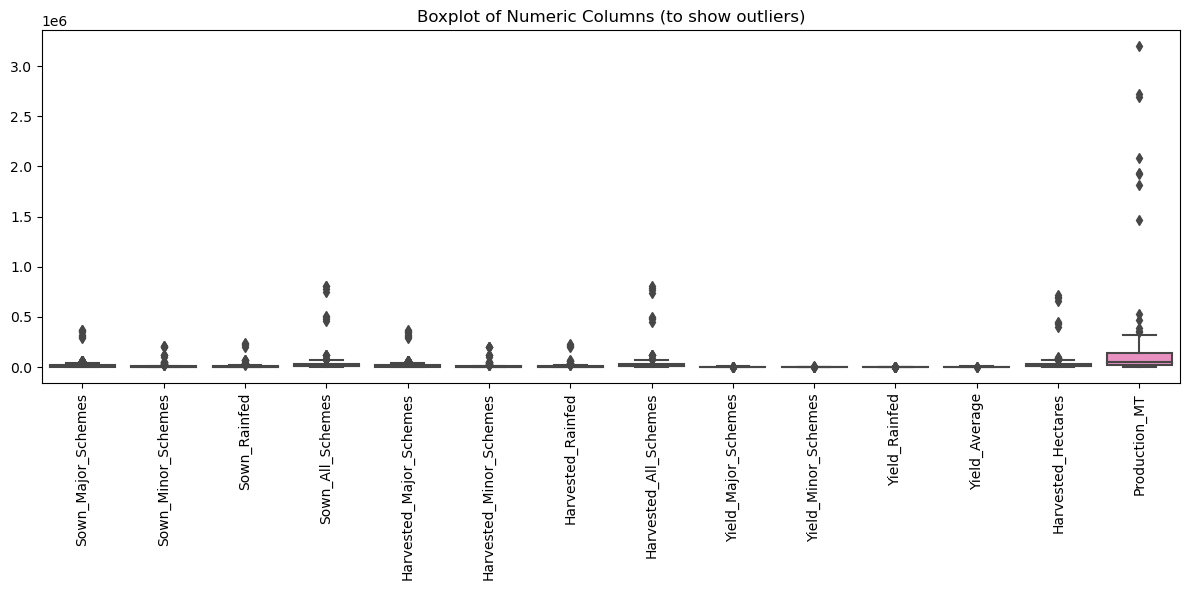

In [ ]:
#To show the outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Columns (to show outliers)")
plt.tight_layout()
plt.show()

In [34]:
metrics = ['Yield_Average','Production_MT']

for metric in metrics:
    print(f"\n Top 5 {metric} values:")
    display(df[['District','Year', 'Season',metric]]
            .sort_values(by = metric, ascending=False)
            .head(5))
    print(f"\n Bottom 5 {metric} values:")
    display(df[['District','Year', 'Season',metric]]
            .sort_values(by=metric, ascending =True)
            .head(5))



 Top 5 Yield_Average values:


,District,Year,Season,Yield_Average
8,HAMBANTOTA,2020.0,Maha,6302.0
34,HAMBANTOTA,2020.0,Yala,5986.0
86,HAMBANTOTA,2021.0,Yala,5814.0
164,HAMBANTOTA,2023.0,Maha,5668.0
89,VAVUNIYA,2021.0,Yala,5638.0



 Bottom 5 Yield_Average values:


,District,Year,Season,Yield_Average
139,JAFFNA,2022.0,Yala,0.0
87,JAFFNA,2021.0,Yala,0.0
35,JAFFNA,2020.0,Yala,0.0
191,JAFFNA,2023.0,Yala,0.0
66,BATTICALOA,2021.0,Maha,1639.0



 Top 5 Production_MT values:


,District,Year,Season,Production_MT
25,SRI LANKA,2020.0,Maha,3196752.0
181,SRI LANKA,2023.0,Maha,2721958.0
129,SRI LANKA,2022.0,Maha,2696040.0
103,SRI LANKA,2021.0,Yala,2088202.0
77,SRI LANKA,2021.0,Maha,1931230.0



 Bottom 5 Production_MT values:


,District,Year,Season,Production_MT
35,JAFFNA,2020.0,Yala,0.0
139,JAFFNA,2022.0,Yala,0.0
87,JAFFNA,2021.0,Yala,0.0
191,JAFFNA,2023.0,Yala,0.0
5,NUWARAELIYA,2020.0,Maha,3525.0


In [35]:
df.to_csv("paddy_2020_2023_cleaned.csv", index=False)

In [36]:
import os
print(os.path.exists("paddy_2020_2023_cleaned.csv"))

True
